# Detección de strawberries

link del dataset: https://universe.roboflow.com/saruta-nonthasiriwat-sr2y9/strawberry-tyqqb/dataset/2

Link interesante, datos de paga:  https://www.kaggle.com/datasets/trainingdatapro/ripe-strawberries-detection/data

Mas imagenes, no revisadas: https://universe.roboflow.com/cs2/farm-detect9/dataset/3

In [ ]:
# Uso de la API de roboflow
#%pip install roboflow --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Descargar el dataset


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="42Nw8TCWU49wkIb2yAce")
project = rf.workspace("leonrosas").project("manzanas-qnxhi")
version = project.version(2)
dataset = version.download("yolov5")





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Manzanas-2 in yolov5pytorch:: 100%|██████████| 556/556 [00:00<00:00, 8784.97it/s]


## Visualización de los datos

In [2]:
# Codigo utilizable como libreria
import os
import yaml
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import shutil

def load_yaml_config(yaml_path):
    """
    Carga un archivo de configuración YAML.

    Args:
        yaml_path (str): Ruta al archivo YAML.

    Returns:
        dict: Contenido del YAML parseado.
    """
    with open(yaml_path, 'r') as file:
        return yaml.safe_load(file)

def count_classes(labels_dir):
    """
    Cuenta las ocurrencias de cada clase en los archivos de etiquetas de un directorio dado.

    Args:
        labels_dir (str): Ruta al directorio que contiene los archivos de etiquetas.

    Returns:
        Counter: Un objeto Counter con los conteos de clases.
    """
    class_counter = Counter()
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as file:
                for line in file:
                    class_id = int(line.split()[0])
                    class_counter[class_id] += 1
    return class_counter

def analyze_class_balance(config_path):
    """
    Analiza el balance de clases en el conjunto de datos según lo especificado en el archivo de configuración.

    Args:
        config_path (str): Ruta al archivo de configuración YAML.

    Returns:
        pd.DataFrame: DataFrame que contiene los conteos de clases para cada división del conjunto de datos.
    """
    config = load_yaml_config(config_path)
    classes = config['names']
    datasets = ['train', 'valid', 'test']
    base_dir = os.path.dirname(config_path)

    results = {}
    for dataset in datasets:
        labels_dir = os.path.join(base_dir, dataset, 'labels')
        if os.path.exists(labels_dir):
            results[dataset] = count_classes(labels_dir)
        else:
            print(f"Advertencia: El directorio '{labels_dir}' no existe. Saltando el conjunto de datos {dataset}.")
            results[dataset] = Counter()

    # Creación del DataFrame
    df = pd.DataFrame({dataset: [results[dataset].get(i, 0) for i in range(len(classes))] for dataset in datasets}, index=classes)

    return df


def plot_class_balance(df):
    """
    Genera un gráfico de barras para visualizar el balance de clases en los diferentes conjuntos de datos.

    Args:
        df (pd.DataFrame): DataFrame que contiene los conteos de clases para cada división del conjunto de datos.
    """
    ax = df.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title('Balance de Clases en los Conjuntos de Datos')
    plt.xlabel('Clases')
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.legend(title='Conjuntos de Datos')
    plt.tight_layout()
    plt.show()


def remove_directory_if_exists(directory_path):
    """
    Elimina un directorio si existe.

    Args:
        directory_path (str): La ruta del directorio a eliminar.
    """
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
        print(f"Directorio '{directory_path}' eliminado exitosamente.")
    else:
        print(f"Directorio '{directory_path}' no existe.")

**NOTA: Es necesario que el dataset se encuentre en el siguiente formato.**


```plaintext
strawberry-2
├── test
├── train
├── valid
└── data.yaml
```



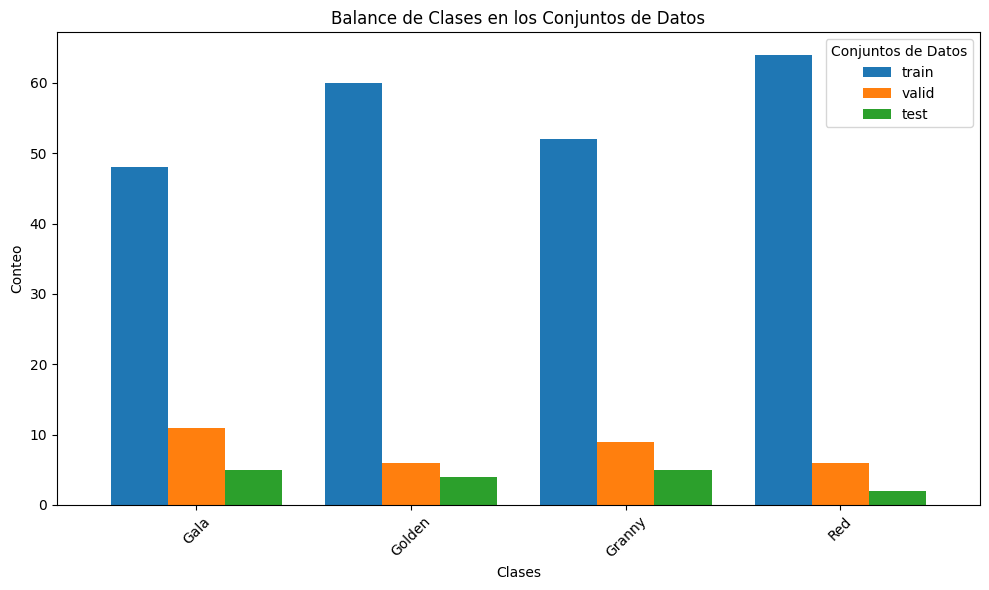

        train  valid  test
Gala       48     11     5
Golden     60      6     4
Granny     52      9     5
Red        64      6     2


In [3]:
class_balance_df = analyze_class_balance(r'/content/Manzanas-2/data.yaml')
plot_class_balance(class_balance_df)
print(class_balance_df)

# Instalación de Ultralytics

In [4]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [5]:
import yaml

# Definir el contenido del archivo YAML
data = {
    'names': ['Gala', 'Golden', 'Granny', 'Red'],
    'nc': 4,
    'test': '/content/Manzanas-2/test',
    'train': '/content/Manzanas-2/train',
    'val': '/content/Manzanas-2/valid'
}

path = r'/content/Manzanas-2/data.yaml'

# Escribir el contenido en un archivo YAML
with open(path , 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Archivo data.yaml creado exitosamente.")


Archivo data.yaml creado exitosamente.


Descripción de la Arquitectura: https://docs.ultralytics.com/yolov5/tutorials/architecture_description/

In [ ]:
remove_directory_if_exists(r'D:\Diplomado-IA\Modulo_5_extendido\Proyecto_1\runs')

In [6]:
from ultralytics import YOLO

model = YOLO("yolov5nu.pt")  # Entrenamiento con pesos pre-entrenados

#model = YOLO("yolov5s.yaml")  Entrenamiento desde cero, revisar los modelos en https://docs.ultralytics.com/models/yolov5/#supported-tasks-and-modes
# NOTA: Yolov5su  has moved towards an anchor-free, objectness-free approach. Sin embargo los detalles arquitectonicos son no cambian, solo el cabezal de detección

model.train(
    data=r"/content/Manzanas-2/data.yaml",
    task="detect",
    mode='train',
    epochs=50,          # Número de épocas de entrenamiento
    patience=100,       # Paciencia para el early stopping
    batch=16,           # Tamaño del batch
    imgsz=640,          # Tamaño de la imagen
    save=True,          # Guardar el modelo después de entrenar
    cache=False,        # Usar caché de datos
    device=None,        # Dispositivo para el entrenamiento (None para auto-detectar)
    workers=8,          # Número de workers para el data loading
    pretrained=True,    # Usar pesos pre-entrenados
    optimizer='auto',   # Optimizador
    verbose=True,       # Imprimir información durante el entrenamiento
    seed=0,             # Semilla para la reproducibilidad
    deterministic=True, # Asegurar entrenamiento determinista
    amp=True,           # Mixed precision training
    val=True,           # Validar después de cada época
    split='val',        # División para validación
    iou=0.7,            # Umbral de IoU
    max_det=300,        # Máximo número de detecciones por imagen
    lr0=0.01,           # Tasa de aprendizaje inicial
    lrf=0.01,           # Factor de reducción de la tasa de aprendizaje
    momentum=0.937,     # Momento para SGD
    weight_decay=0.0005,# Decaimiento de peso
    warmup_epochs=3.0,  # Número de épocas de calentamiento
    warmup_momentum=0.8,# Momento durante el calentamiento
    warmup_bias_lr=0.1, # Tasa de aprendizaje para el sesgo durante el calentamiento
    box=7.5,            # Pérdida de la caja
    cls=0.5,            # Pérdida de la clase
    dfl=1.5,            # Pérdida de distribución focal
    mosaic=1.0,         # Probabilidad de aplicar la técnica de mosaic
    auto_augment='randaugment', # Tipo de aumento automático
    erasing=0.4,        # Probabilidad de borrado aleatorio
    save_dir='runs/detect/train', # Directorio para guardar los resultados
    name = 'exp-YOLOv5nmanz'
)


100%|██████████| 5.31M/5.31M [00:00<00:00, 246MB/s]


Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5nu.pt, data=/content/Manzanas-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=exp-YOLOv5nmanz, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 66.6MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1760  ultralytics.nn.modules.conv.Conv             [3, 16, 6, 2, 2]              
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      4800  ultralytics.nn.modules.block.C3              [32, 32, 1]                   
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     29184  ultralytics.nn.modules.block.C3              [64, 64, 2]                   
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  3    156928  ultralytics.nn.modules.block.C3              [128, 128, 3]                 
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 369MB/s]


AMP: checks passed ✅


train: Scanning /content/Manzanas-2/train/labels... 224 images, 0 backgrounds, 0 corrupt: 100%|██████████| 224/224 [00:00<00:00, 1266.60it/s]

train: New cache created: /content/Manzanas-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Manzanas-2/valid/labels... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<00:00, 364.61it/s]

val: New cache created: /content/Manzanas-2/valid/labels.cache


Plotting labels to runs/detect/exp-YOLOv5nmanz/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/exp-YOLOv5nmanz
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.56G      1.074      3.245      1.413         38        640: 100%|██████████| 14/14 [00:07<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]

                   all         32         32    0.00345          1      0.378      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.2G     0.8697       2.12      1.215         34        640: 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         32         32     0.0436          1      0.848      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.2G     0.8671      1.537      1.195         32        640: 100%|██████████| 14/14 [00:05<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         32         32      0.851       0.45      0.872      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.2G     0.8671       1.28      1.152         31        640: 100%|██████████| 14/14 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         32         32      0.935       0.68       0.94      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.2G      0.812      1.241      1.127         42        640: 100%|██████████| 14/14 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         32         32      0.872      0.863       0.91      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.2G     0.8249      1.213       1.13         32        640: 100%|██████████| 14/14 [00:06<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         32         32      0.873      0.852      0.937      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.2G     0.8614      1.147      1.152         33        640: 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         32         32      0.695      0.917      0.906      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.2G     0.8582      1.181      1.153         27        640: 100%|██████████| 14/14 [00:03<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         32         32      0.869      0.924      0.972      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.2G     0.8442      1.145      1.149         32        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         32         32      0.889      0.919      0.979      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.2G     0.7918      1.106      1.112         33        640: 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         32         32      0.922      0.878      0.914      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.2G     0.8322     0.9853      1.105         39        640: 100%|██████████| 14/14 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         32         32      0.913      0.917      0.903       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.2G      0.819      1.046      1.123         39        640: 100%|██████████| 14/14 [00:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         32         32      0.964      0.961      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.2G     0.7648     0.9064      1.092         33        640: 100%|██████████| 14/14 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         32         32       0.62      0.535      0.605      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.2G     0.7813     0.8676      1.087         32        640: 100%|██████████| 14/14 [00:03<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         32         32      0.889          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       2.2G     0.7612     0.8802       1.08         23        640: 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         32         32       0.99          1      0.995      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.2G     0.7138     0.8081      1.055         34        640: 100%|██████████| 14/14 [00:05<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         32         32       0.92      0.996      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.2G     0.7616     0.8157      1.093         35        640: 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         32         32      0.818      0.813      0.844       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.2G     0.7675     0.8125      1.081         37        640: 100%|██████████| 14/14 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         32         32      0.953      0.919      0.992      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.2G     0.7606      0.795      1.095         32        640: 100%|██████████| 14/14 [00:05<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         32         32      0.973          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.2G     0.7652     0.7859      1.086         33        640: 100%|██████████| 14/14 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         32         32      0.948      0.927      0.958      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.2G     0.7182     0.7596      1.056         26        640: 100%|██████████| 14/14 [00:03<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         32         32      0.977          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.2G     0.7276     0.7335      1.058         32        640: 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         32         32       0.89      0.984      0.964      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.2G     0.7608      0.732       1.06         34        640: 100%|██████████| 14/14 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         32         32      0.952      0.922      0.957      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.2G     0.7325     0.6963      1.069         36        640: 100%|██████████| 14/14 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         32         32      0.902      0.984      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.2G     0.7168     0.6764       1.08         41        640: 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         32         32      0.981          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.2G     0.6968     0.6718      1.062         32        640: 100%|██████████| 14/14 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         32         32       0.99          1      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.2G     0.6771     0.6424      1.025         46        640: 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         32         32      0.984          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.2G     0.7221     0.6592      1.075         31        640: 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         32         32      0.901      0.995      0.957      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.2G     0.6859     0.6297      1.044         34        640: 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         32         32      0.951      0.924      0.957      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.2G     0.6721     0.5964      1.032         30        640: 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         32         32      0.914      0.996      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.2G     0.6799     0.6161      1.073         30        640: 100%|██████████| 14/14 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         32         32      0.915      0.995      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.2G     0.6532     0.5874      1.023         38        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         32         32      0.935          1      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.2G     0.6602     0.5802      1.036         26        640: 100%|██████████| 14/14 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         32         32      0.951       0.99      0.995      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.2G     0.6694     0.5851      1.036         28        640: 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         32         32      0.974          1      0.995      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.2G     0.6799     0.5675       1.05         30        640: 100%|██████████| 14/14 [00:05<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         32         32      0.965          1      0.995      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.2G     0.6117     0.5429       1.02         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         32         32      0.988          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.2G     0.6322     0.5478       1.02         39        640: 100%|██████████| 14/14 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         32         32      0.989          1      0.995      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.2G     0.6454     0.5463      1.033         44        640: 100%|██████████| 14/14 [00:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         32         32      0.989          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.2G       0.62     0.5192      1.013         38        640: 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         32         32      0.991          1      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.2G     0.6393     0.5135      1.006         37        640: 100%|██████████| 14/14 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         32         32      0.993          1      0.995      0.883


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.5G     0.5426     0.6031      1.024         16        640: 100%|██████████| 14/14 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         32         32      0.984          1      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.2G     0.5579     0.6454          1         16        640: 100%|██████████| 14/14 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         32         32      0.951      0.919      0.964      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.2G     0.5354     0.5685      1.002         16        640: 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         32         32      0.955      0.919      0.964      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.2G      0.532     0.5605      1.002         16        640: 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         32         32      0.956       0.92       0.96      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.2G     0.5149     0.5481      1.018         16        640: 100%|██████████| 14/14 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         32         32      0.955      0.919       0.97      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.2G     0.5151     0.5389     0.9938         16        640: 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         32         32      0.956       0.92      0.995      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.2G     0.5149     0.5076      0.977         16        640: 100%|██████████| 14/14 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         32         32      0.956      0.919      0.995      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       2.2G     0.5115     0.5113       1.01         16        640: 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all         32         32      0.877          1      0.995      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.2G      0.495     0.5165     0.9695         16        640: 100%|██████████| 14/14 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         32         32      0.876          1      0.995      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.2G     0.5098     0.5089     0.9915         16        640: 100%|██████████| 14/14 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         32         32      0.897          1      0.995      0.902



50 epochs completed in 0.082 hours.
Optimizer stripped from runs/detect/exp-YOLOv5nmanz/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/exp-YOLOv5nmanz/weights/best.pt, 5.3MB

Validating runs/detect/exp-YOLOv5nmanz/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2,503,724 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


                   all         32         32      0.897          1      0.995      0.902
                  Gala         11         11        0.8          1      0.995      0.903
                Golden          6          6      0.888          1      0.995      0.929
                Granny          9          9      0.922          1      0.995      0.901
                   Red          6          6      0.978          1      0.995      0.874
Speed: 0.4ms preprocess, 3.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/exp-YOLOv5nmanz


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb49b5dd300>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

## Evaluación del modelo entrenado

https://docs.ultralytics.com/modes/val/

In [7]:
metrics = model.val(imgsz = 640, split = 'test', plots = True, name = 'Metrics-test-exp-YOLOV5nmanz')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2,503,724 parameters, 0 gradients, 7.1 GFLOPs


val: Scanning /content/Manzanas-2/test/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 973.88it/s]

val: New cache created: /content/Manzanas-2/test/labels.cache



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]


                   all         16         16      0.985          1      0.995      0.944
                  Gala          5          5      0.986          1      0.995      0.935
                Golden          4          4      0.992          1      0.995      0.902
                Granny          5          5      0.985          1      0.995      0.995
                   Red          2          2      0.977          1      0.995      0.945
Speed: 0.3ms preprocess, 19.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/Metrics-test-exp-YOLOV5nmanz


In [8]:
metrics = model.val(imgsz = 640, split = 'val', plots = True, name = 'Metrics-val-YOLOV5nmanz')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Manzanas-2/valid/labels.cache... 32 images, 0 backgrounds, 0 corrupt: 100%|██████████| 32/32 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]


                   all         32         32      0.897          1      0.995      0.901
                  Gala         11         11        0.8          1      0.995      0.903
                Golden          6          6      0.888          1      0.995      0.929
                Granny          9          9      0.922          1      0.995        0.9
                   Red          6          6      0.979          1      0.995      0.874
Speed: 0.4ms preprocess, 6.4ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/Metrics-val-YOLOV5nmanz


In [9]:
metrics = model.val(imgsz = 640, split = 'train', plots = True, name = 'Metrics-train-YOLOV5nmanz')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/Manzanas-2/train/labels.cache... 224 images, 0 backgrounds, 0 corrupt: 100%|██████████| 224/224 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.95it/s]


                   all        224        224      0.998          1      0.995      0.904
                  Gala         48         48          1          1      0.995      0.889
                Golden         60         60      0.998          1      0.995      0.897
                Granny         52         52      0.997          1      0.995      0.924
                   Red         64         64      0.998          1      0.995      0.907
Speed: 0.7ms preprocess, 6.6ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/Metrics-train-YOLOV5nmanz


# Predicciones

In [10]:
from ultralytics import YOLO
model = YOLO(r"/content/runs/detect/exp-YOLOv5nmanz/weights/best.pt")

In [11]:
model.predict(r"/content/Manzanas-2/valid/images/Golden-s-217-_png.rf.c0bf0b11d836ca9e38e2224c4b34cefe.jpg", save=True, imgsz=640, conf=0.22)


image 1/1 /content/Manzanas-2/valid/images/Golden-s-217-_png.rf.c0bf0b11d836ca9e38e2224c4b34cefe.jpg: 640x640 1 Golden, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Gala', 1: 'Golden', 2: 'Granny', 3: 'Red'}
 obb: None
 orig_img: array([[[141, 142, 140],
         [141, 142, 140],
         [142, 143, 141],
         ...,
         [146, 146, 140],
         [147, 147, 141],
         [147, 147, 141]],
 
        [[141, 142, 140],
         [142, 143, 141],
         [143, 144, 142],
         ...,
         [148, 148, 142],
         [148, 148, 142],
         [149, 149, 143]],
 
        [[143, 144, 142],
         [143, 144, 142],
         [144, 145, 143],
         ...,
         [150, 150, 144],
         [150, 150, 144],
         [150, 150, 144]],
 
        ...,
 
        [[144, 146, 140],
         [144, 146, 140],
         [144, 146, 140],
         ...,
         [147, 147, 141],
         [147, 147, 141],
         [146, 146, 140]],
 
        [[144, 146, 140],
         [144, 146, 140],
         [144, 146, 140]

In [12]:
model.predict(r"/content/Manzanas-2/test/images", save=True, imgsz=640, conf=0.22, save_txt = True, save_conf = False)


image 1/16 /content/Manzanas-2/test/images/Gala-s-136-_png.rf.38b2e65437944cab4c7e63c3ce83c4e7.jpg: 640x640 1 Gala, 11.1ms
image 2/16 /content/Manzanas-2/test/images/Gala-s-144-_png.rf.4849d81551dc2c11226b1a7d54f9d551.jpg: 640x640 1 Gala, 12.6ms
image 3/16 /content/Manzanas-2/test/images/Gala-s-210-_png.rf.6bd561e70b560660ca5efe602226d8d3.jpg: 640x640 1 Gala, 11.7ms
image 4/16 /content/Manzanas-2/test/images/Gala-s-82-_png.rf.aa3771dbd2cd43e5bafcf7e7ac387919.jpg: 640x640 1 Gala, 12.1ms
image 5/16 /content/Manzanas-2/test/images/Gala-s-88-_png.rf.b99a484a1c4b6f024e582f55a3a139b8.jpg: 640x640 1 Gala, 9.3ms
image 6/16 /content/Manzanas-2/test/images/Golden-s-128-_png.rf.0b389ef3f982e7c5a4a1609d8977750d.jpg: 640x640 1 Golden, 7.7ms
image 7/16 /content/Manzanas-2/test/images/Granny-s-16-_png.rf.c82c642934fedfadbebd109df8d6d95b.jpg: 640x640 1 Granny, 8.2ms
image 8/16 /content/Manzanas-2/test/images/Granny-s-168-_png.rf.e527105a9f98100d7dd1d47e21d0af9e.jpg: 640x640 1 Granny, 7.8ms
image 9/16

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Gala', 1: 'Golden', 2: 'Granny', 3: 'Red'}
 obb: None
 orig_img: array([[[143, 146, 144],
         [143, 146, 144],
         [143, 146, 144],
         ...,
         [142, 143, 139],
         [143, 144, 140],
         [143, 144, 140]],
 
        [[143, 146, 144],
         [143, 146, 144],
         [143, 146, 144],
         ...,
         [142, 143, 139],
         [142, 143, 139],
         [143, 144, 140]],
 
        [[143, 146, 144],
         [143, 146, 144],
         [143, 146, 144],
         ...,
         [143, 144, 140],
         [143, 144, 140],
         [143, 144, 140]],
 
        ...,
 
        [[139, 145, 140],
         [139, 145, 140],
         [139, 145, 140],
         ...,
         [145, 148, 139],
         [145, 149, 138],
         [144, 148, 137]],
 
        [[138, 145, 140],
         [138, 145, 140],
         [138, 145, 140]

Resultados
Confusion
F1 ENTRENAMIENTO
RESULTS


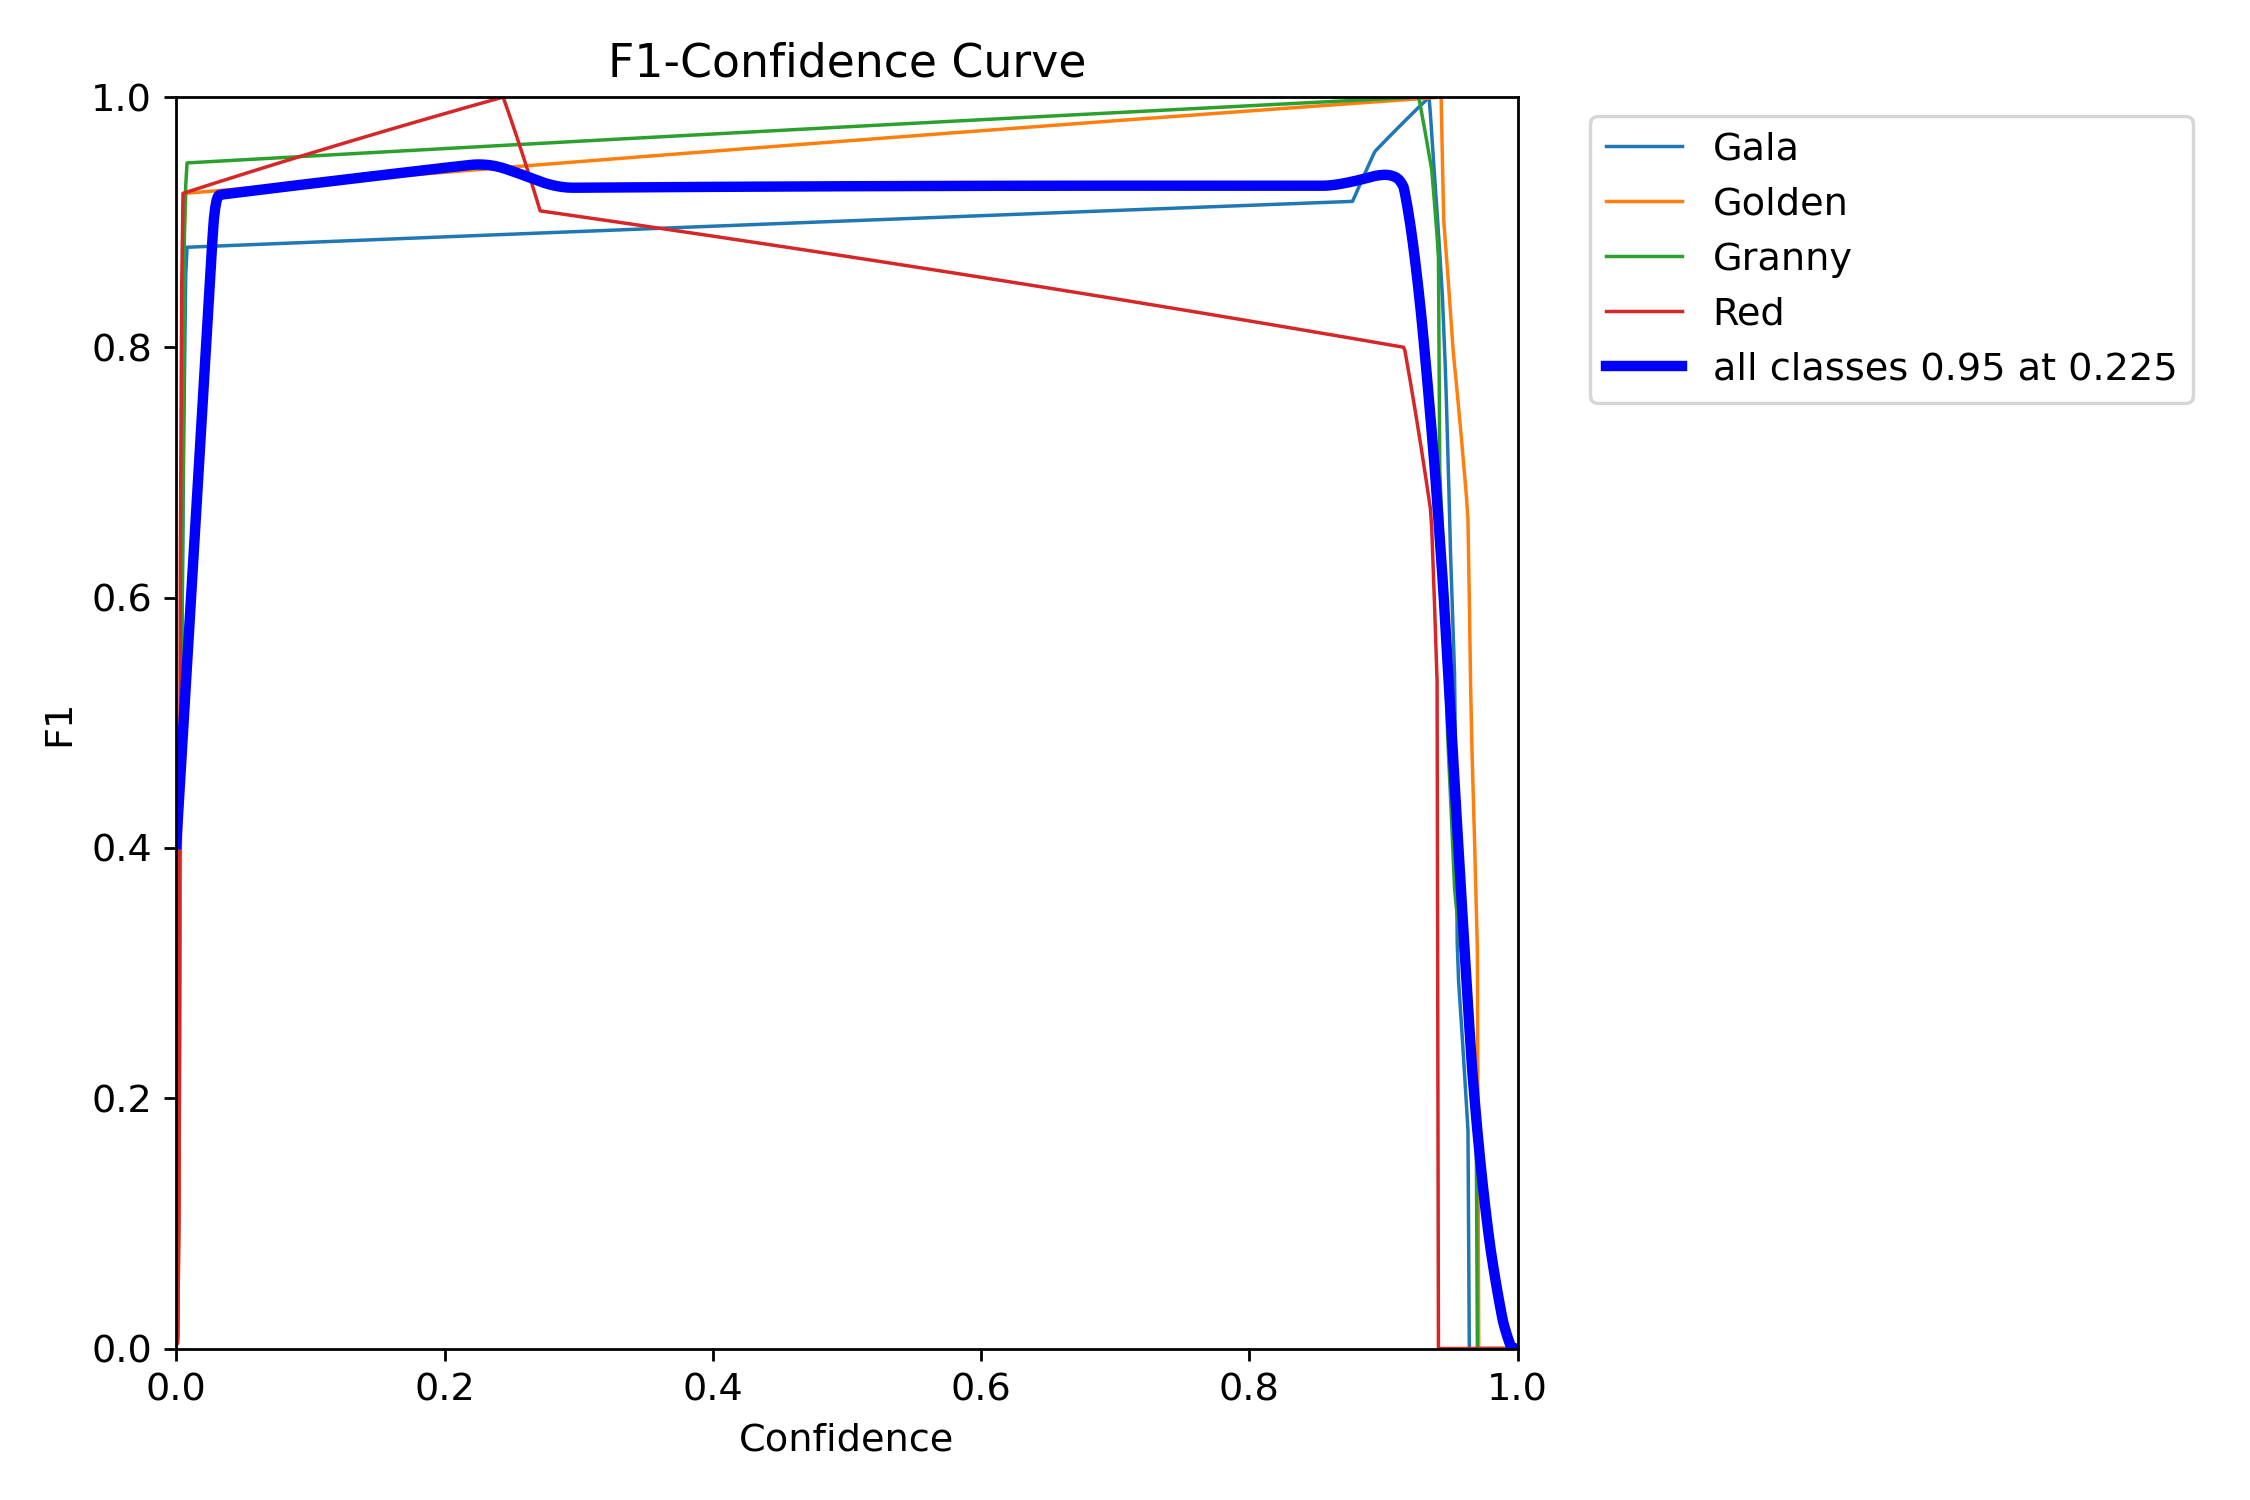

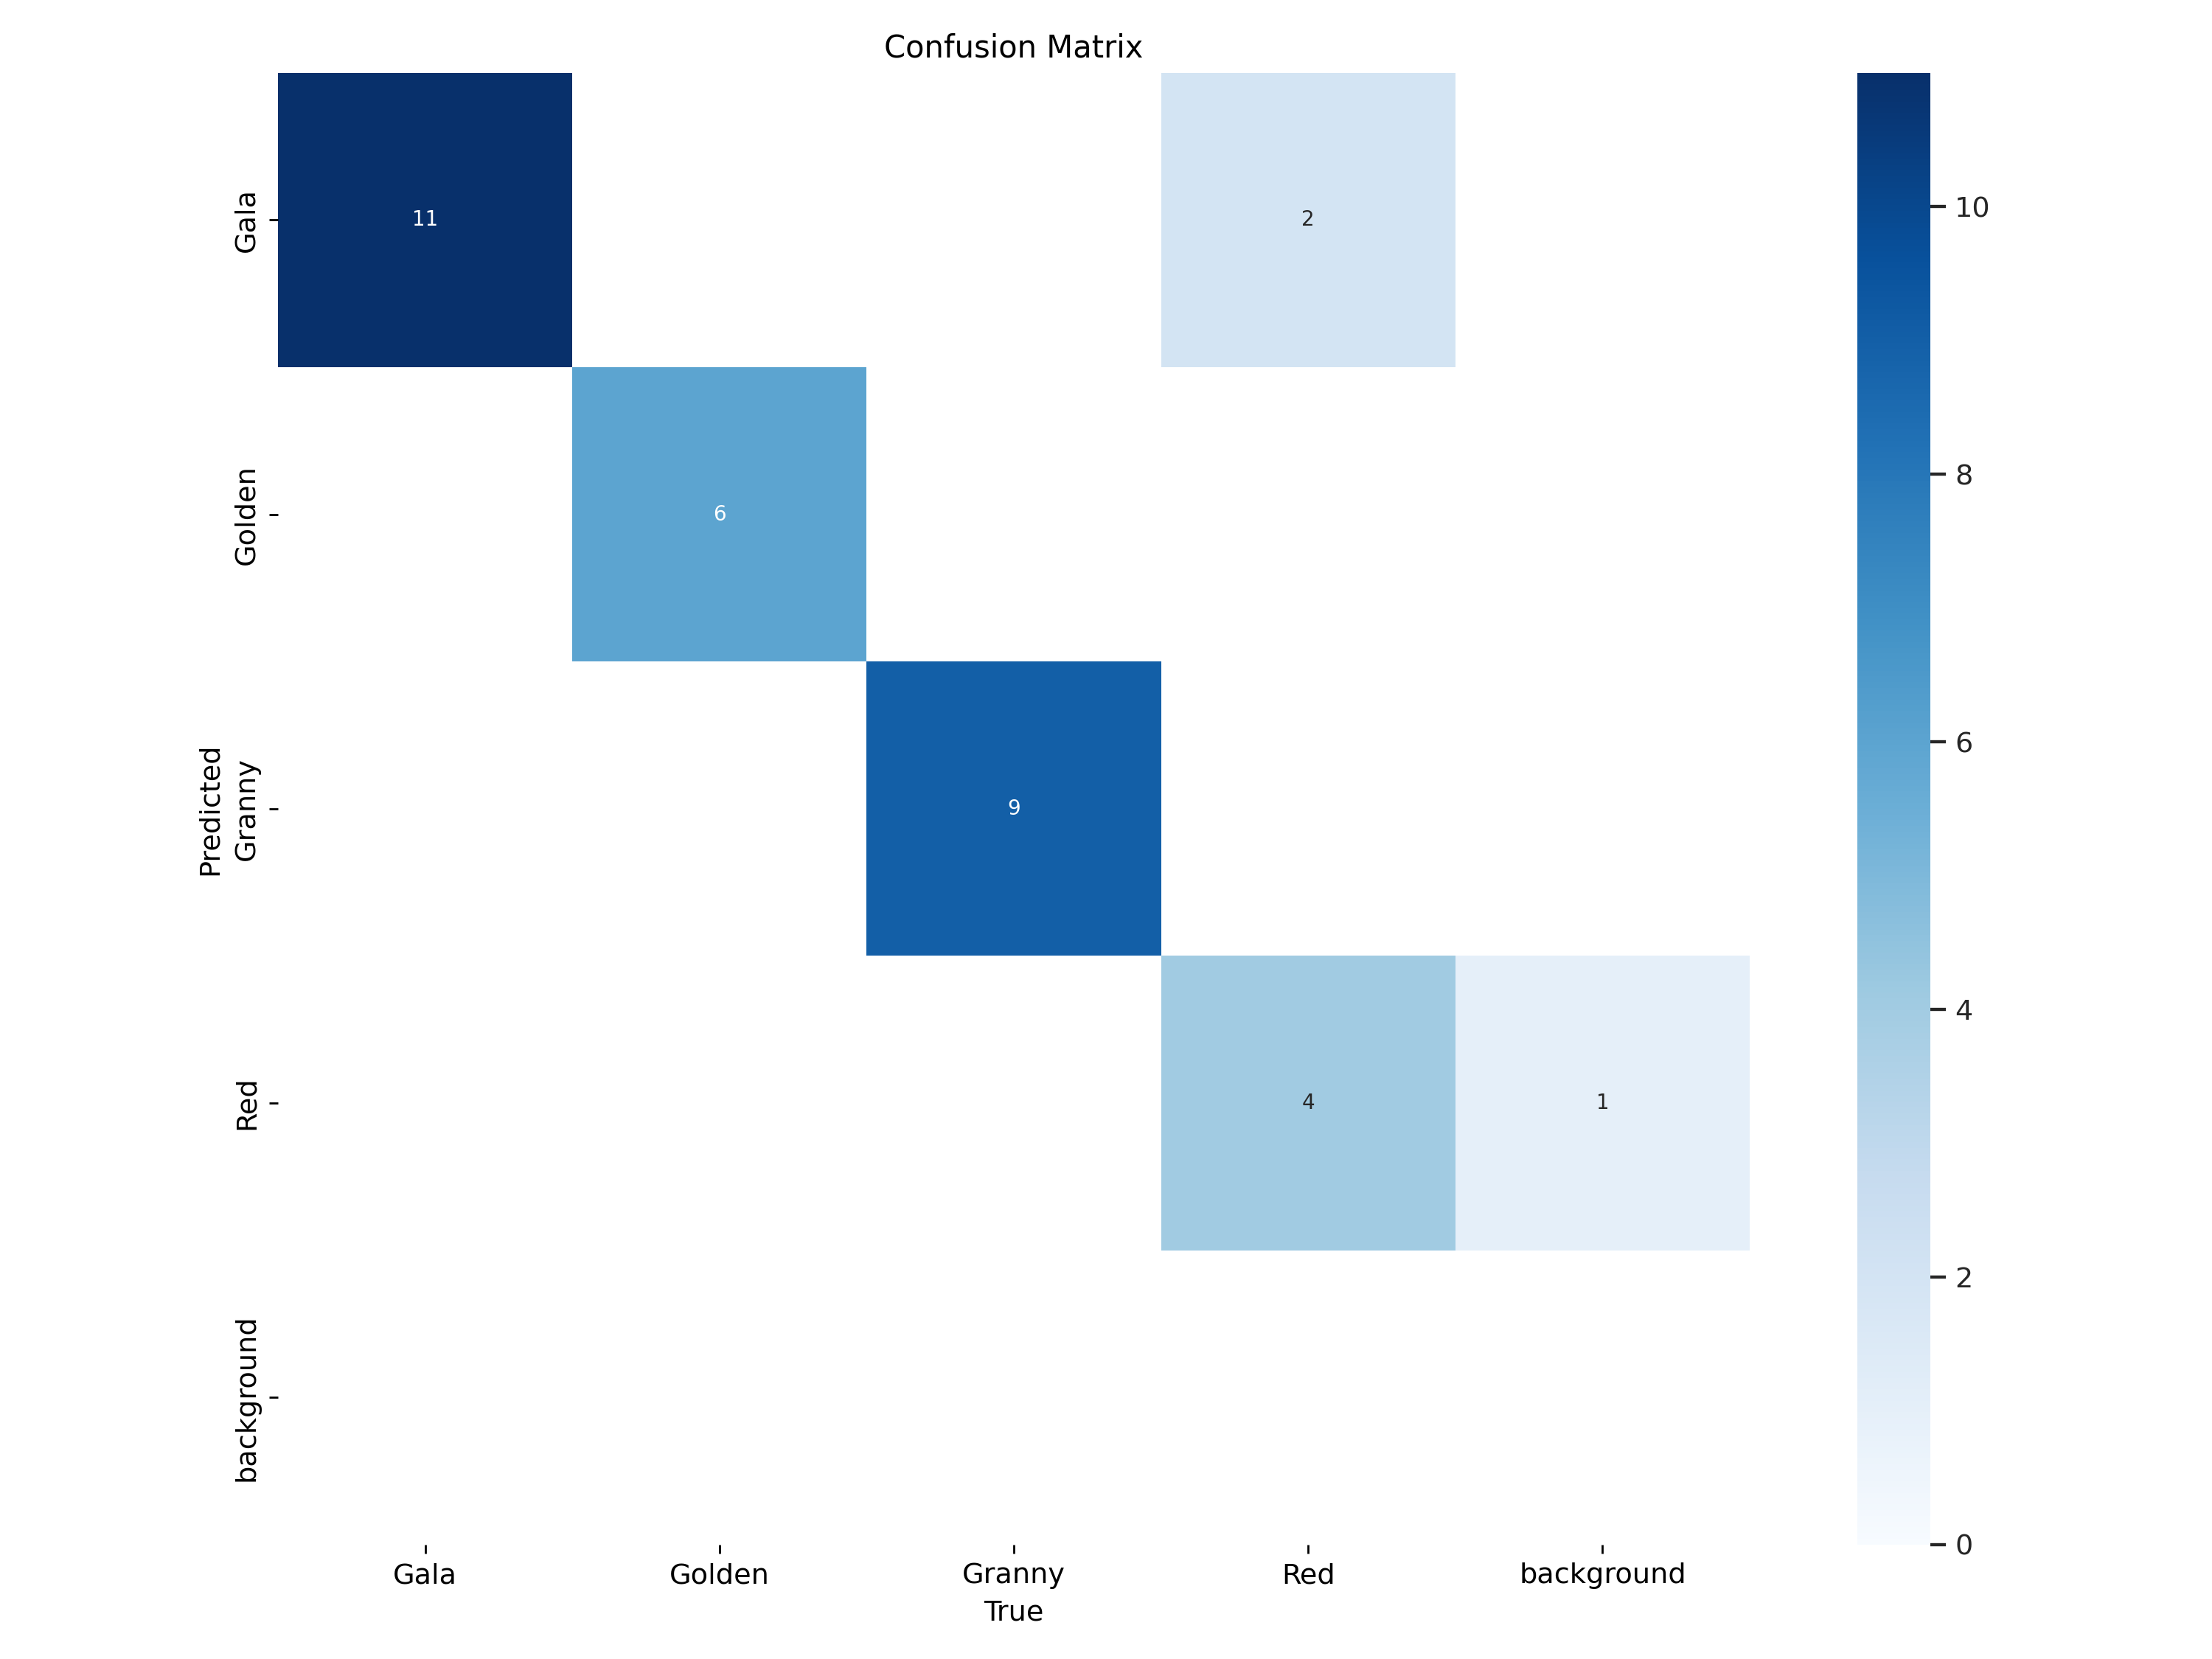

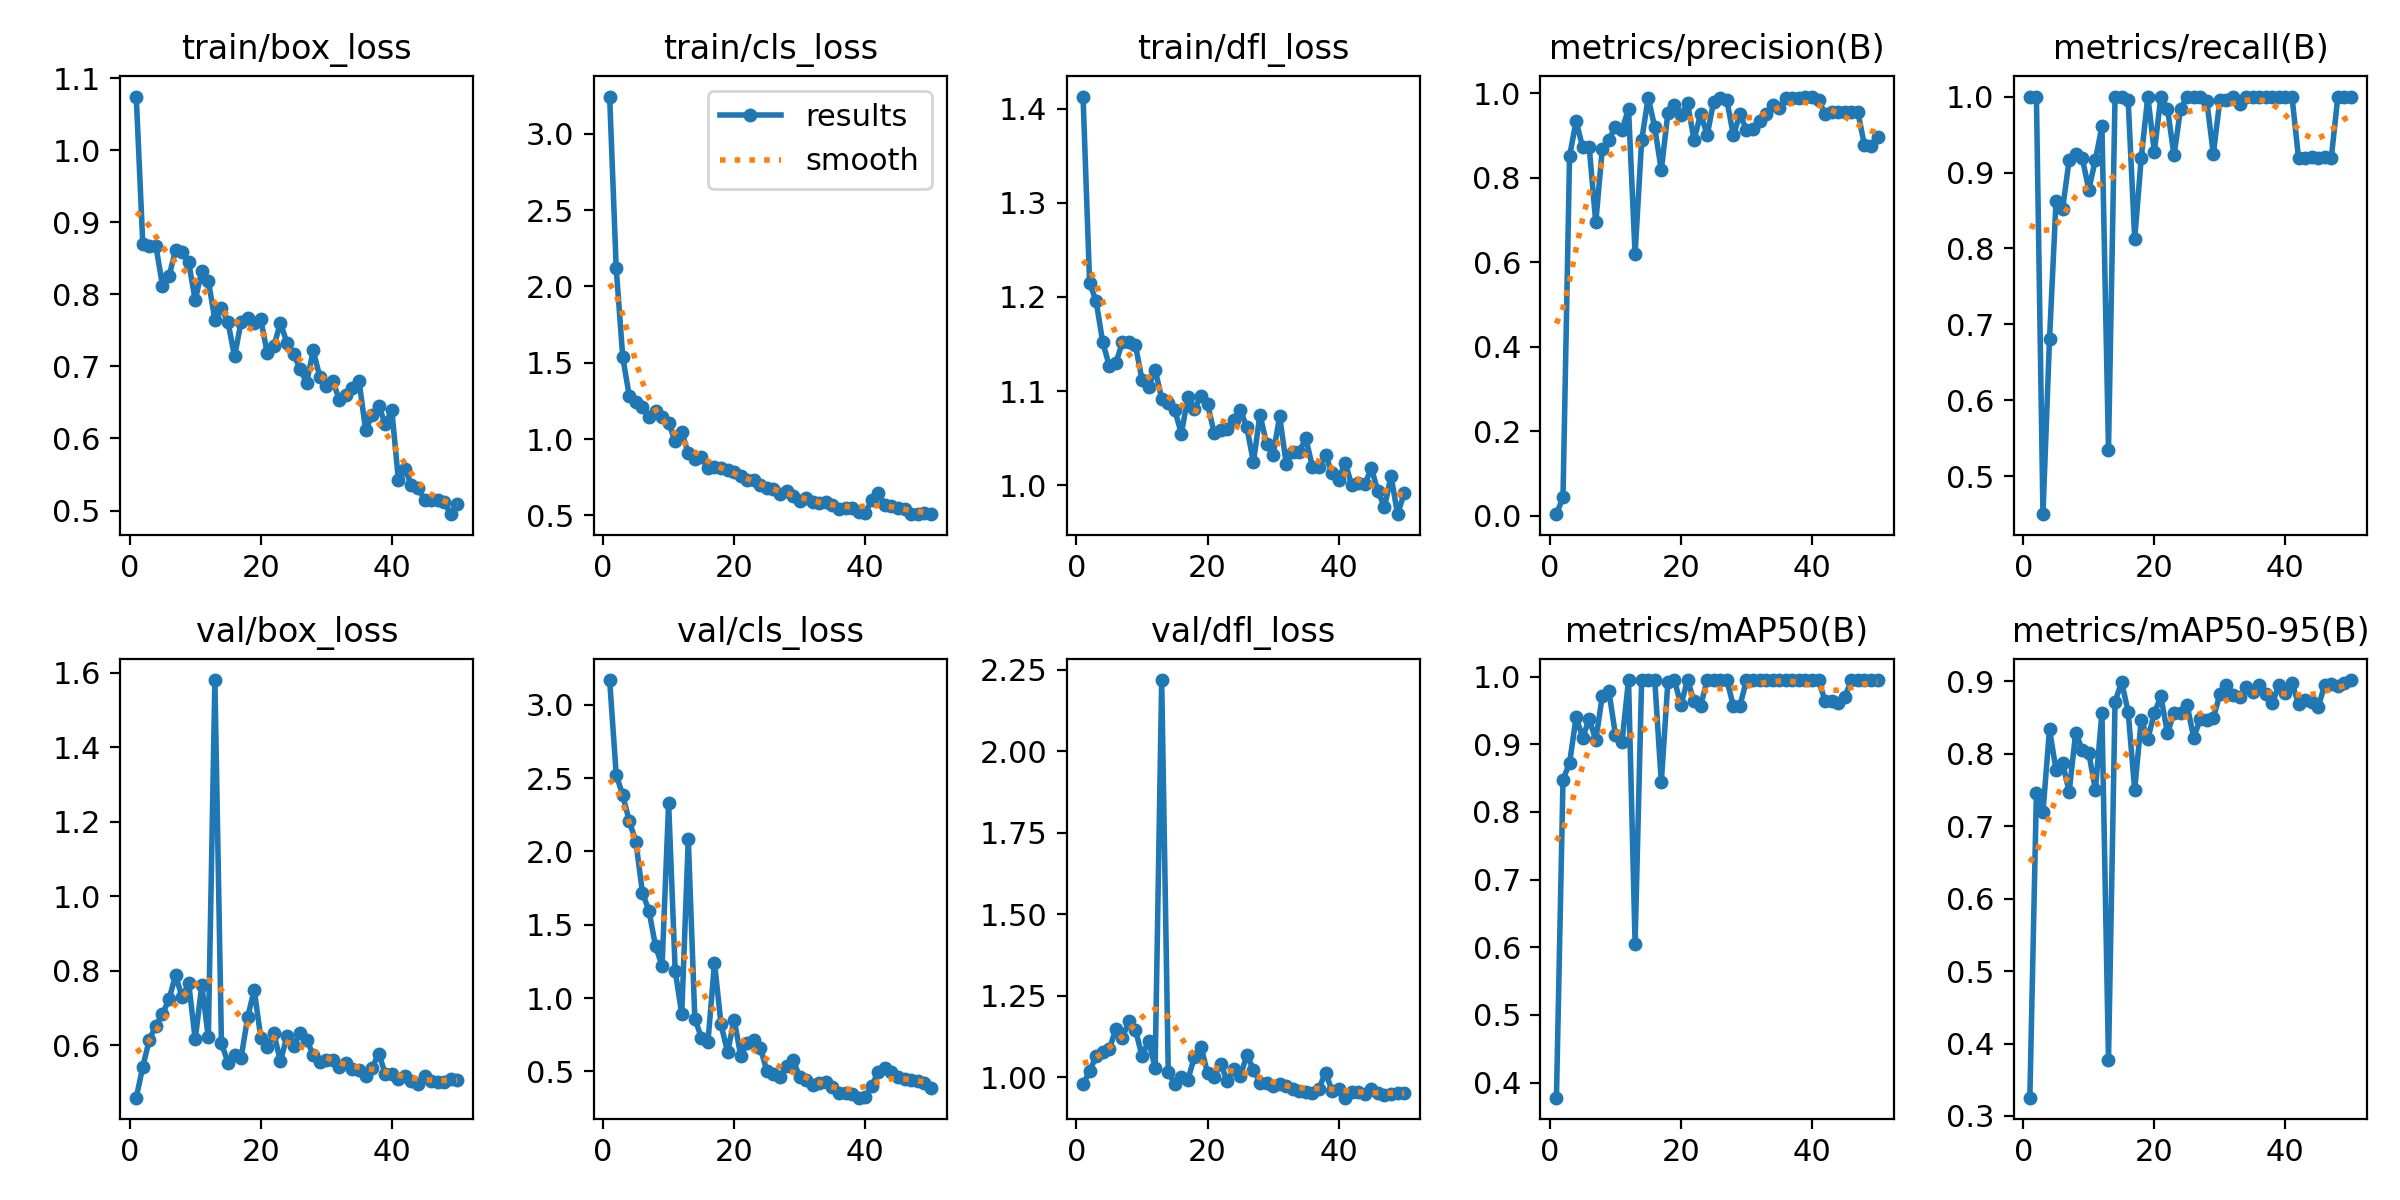

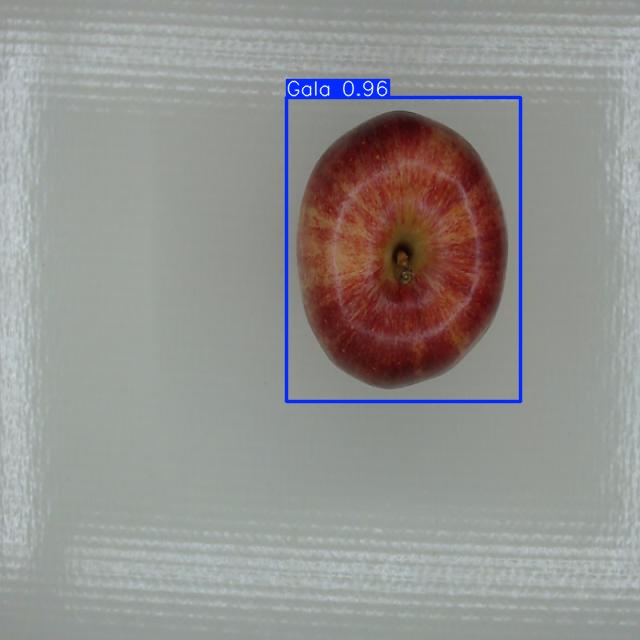

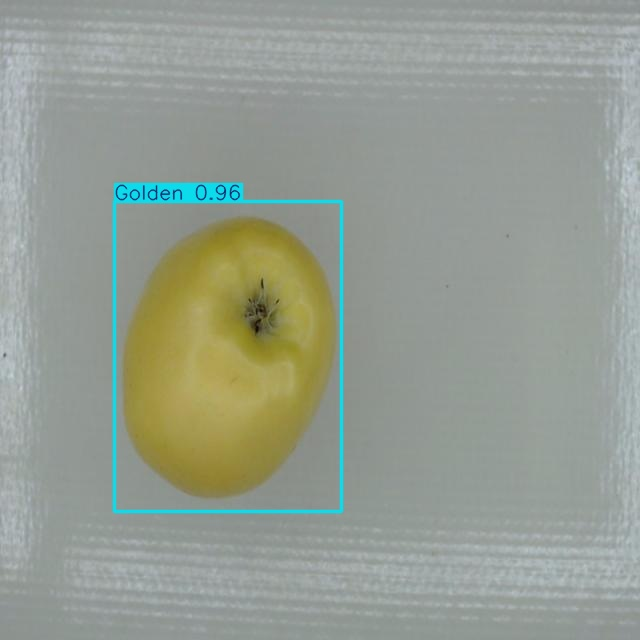

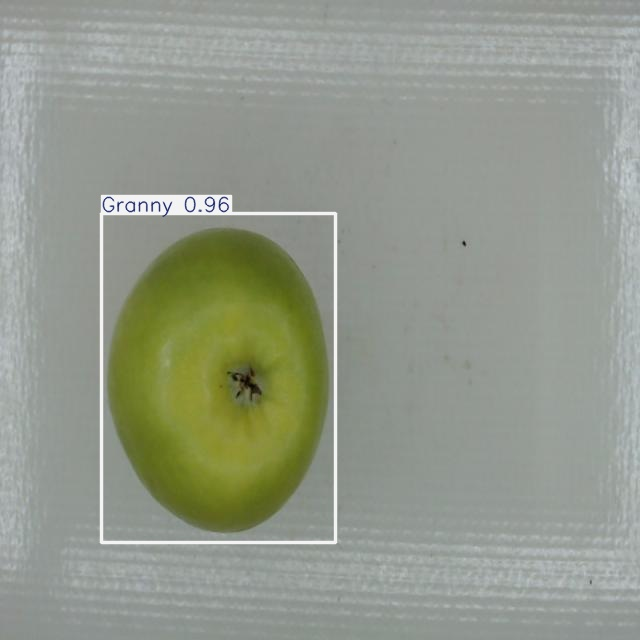

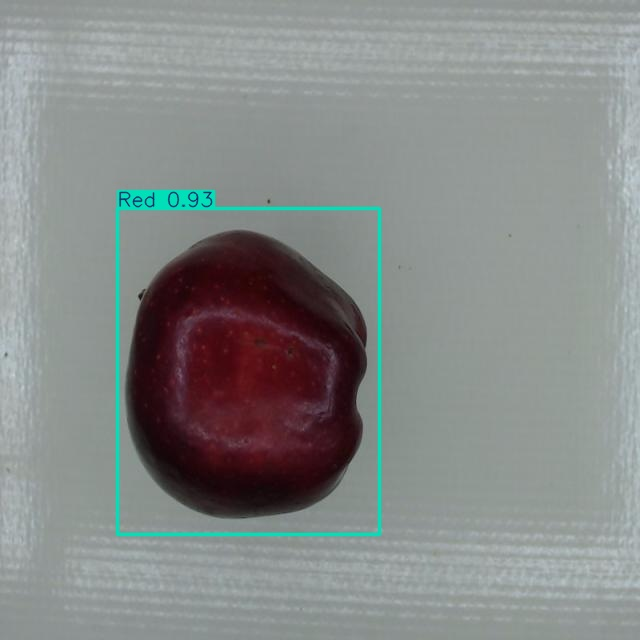